In [5]:
import numpy as np

# Qiskit libraries 
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT

In [78]:
def add_value(data_qubits: int, const: int):
    qc = QuantumCircuit(data_qubits)
    a = bin(const)[2:]
    while len(a) < data_qubits:
        a = '0'+a
    a=a[::-1]
    list_a = [0]*data_qubits
    for i in range(data_qubits): 
        if a[i] =='1':
            k = 0
            for j in range(i,data_qubits):
                list_a[data_qubits-j-1] +=np.pi/float(2**(k)) 
                k+=1

    for i in range(data_qubits):
        if list_a[i] != 0:
            qc.p(list_a[i],i)
            k+=1

    return qc

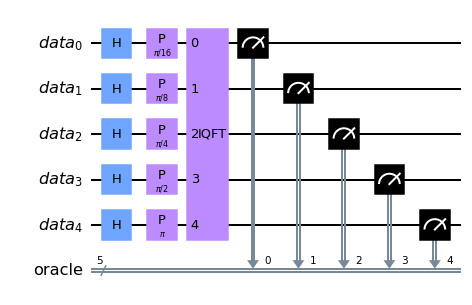

In [224]:
def find_number(q0,q1,q2,q3,q4):
    num_cats = 5
    quantum_cats = QuantumRegister(num_cats, "data")
    purple_cats = ClassicalRegister(num_cats,"oracle")
    qc = QuantumCircuit(quantum_cats,purple_cats)


    qc.h(range(num_cats))
    #qc.append(add_value(num_cats, 10),quantum_cats)

    qc.p(q0*np.pi/16,0)
    qc.p(q1*np.pi/8,1)
    qc.p(q2*np.pi/4,2)
    qc.p(q3*np.pi/2,3)
    qc.p(q4*np.pi,4)

    qc = qc.compose(QFT(num_qubits=num_cats,inverse=True),quantum_cats)
    qc.measure(quantum_cats,purple_cats)
    return qc
qc = find_number(1,1,1,1,1)

qc.draw("mpl")

In [225]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print((counts))

{'00001': 1024}
